# Singapore Flat Resale Prices 1990-Present: Time Series Analysis

- Month - Month of sale
- Type - Designated residential area with its own amenities, infrastructure, and community facilities
- Flat Type - Classification of units by room size. They range from 2 to 5 rooms, 3Gen units, and Executive units.
- Block - A HDB building comprising multiple flats or apartments
- Street Name - Name of the road the HDB flat is located along
- Storey Range - Estimated range of floors the unit sold was located on
- Floor Area - Total interior space within the unit, measured in square meters
- Flat Model - Classification of units by generation of which the flat was made, ranging from New Generation, DBSS, Improved, Apartment
- Lease Commence Date - Starting point of a lease agreement, marking the beginning of the lease term during which the tenant has the right to use and occupy the leased property
- Resale Price - Cost of the flat sold

In [15]:
from src.config import PROCESSED_DATA_DIR
from src.dataset import filename
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(PROCESSED_DATA_DIR / filename)
df.head()

,date,month,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_year,years_leased,resale_price,infl_adj_price
0,1990-01-01,1,1990,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,13,9000.0,14748.5
1,1990-01-01,1,1990,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,13,6000.0,9832.3
2,1990-01-01,1,1990,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,13,8000.0,13109.8
3,1990-01-01,1,1990,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,13,6000.0,9832.3
4,1990-01-01,1,1990,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,14,47200.0,77347.7


## Average Prices

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df_avg = df.groupby('date')['infl_adj_price'].mean()
df_avg = pd.DataFrame(df_avg).reset_index()
df_avg

,date,infl_adj_price
0,1990-01-01,106867.795222
1,1990-02-01,111221.765521
2,1990-03-01,109144.491304
3,1990-04-01,108041.172397
4,1990-05-01,111166.174036
...,...,...
414,2024-07-01,616816.872167
415,2024-08-01,621291.916628
416,2024-09-01,629171.304486
417,2024-10-01,628665.175849


<Axes: ylabel='Inflation Adjusted Flat Resale Prices'>

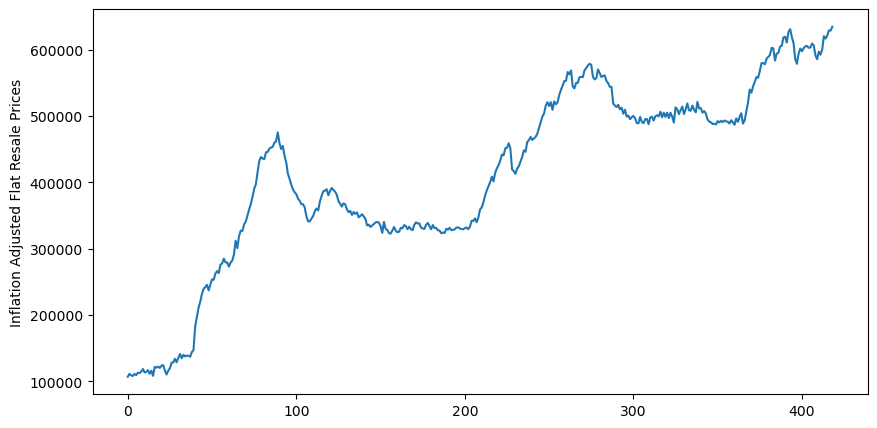

In [5]:
# Setting the text on the Y-axis
plt.ylabel("Inflation Adjusted Flat Resale Prices")

# Setting the size of our graph
df_avg['infl_adj_price'].plot(figsize=(10,5))

In [6]:
df_avg['MA3'] = df_avg['infl_adj_price'].shift(1).rolling(window=3).mean()
df_avg['MA9']= df_avg['infl_adj_price'].shift(1).rolling(window=9).mean()
df_avg.head(20)

,date,infl_adj_price,MA3,MA9
0,1990-01-01,106867.795222,NaN,NaN
1,1990-02-01,111221.765521,NaN,NaN
2,1990-03-01,109144.491304,NaN,NaN
3,1990-04-01,108041.172397,109078.017349,NaN
4,1990-05-01,111166.174036,109469.143074,NaN
5,1990-06-01,109449.506068,109450.612579,NaN
6,1990-07-01,113030.661210,109552.284167,NaN
7,1990-08-01,112426.720686,111215.447105,NaN
8,1990-09-01,114631.024740,111635.629321,NaN
9,1990-10-01,118595.138642,113362.802212,110664.367909


In [7]:
# Dropping the NaN values
df_avg = df_avg.dropna()

# Initialising X and assigning the two feature variables
X = df_avg[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
9,113362.802212,110664.367909
10,115217.628023,111967.406067
11,115537.233543,112207.825148
12,115404.489872,112773.192084
13,114843.051160,113758.708762


In [8]:
# Setting-up the dependent variable
y = df_avg['infl_adj_price']

# Getting the head of the data
y.head()

9     118595.138642
10    113385.537248
11    114232.793725
12    116910.822506
13    111400.737377
Name: infl_adj_price, dtype: float64

In [9]:
# Setting the training set to 80% of the data
training = 0.7
t = int(training*len(df_avg))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [10]:
X[:t]

,MA3,MA9
9,113362.802212,110664.367909
10,115217.628023,111967.406067
11,115537.233543,112207.825148
12,115404.489872,112773.192084
13,114843.051160,113758.708762
...,...,...
291,516028.628751,539983.163561
292,515384.180228,535141.024218
293,513487.854581,529479.932491
294,513165.394613,524991.831963


In [11]:
model = LinearRegression().fit(X_train,y_train)

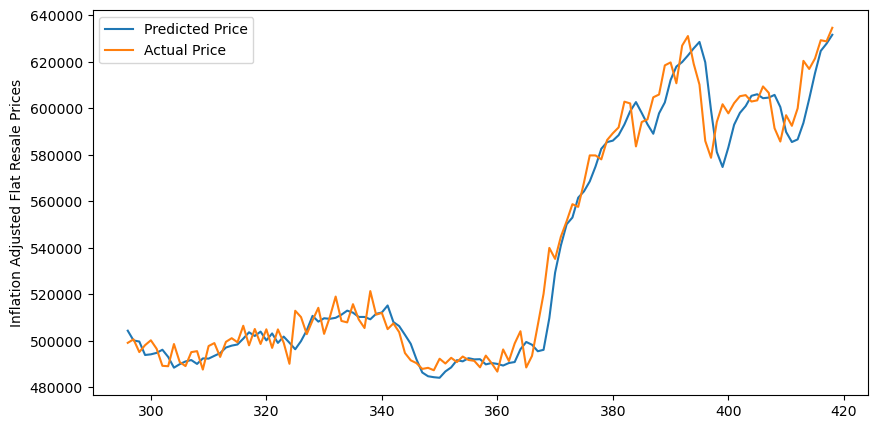

In [12]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Inflation Adjusted Flat Resale Prices")
plt.show()

In [13]:
# Computing the accuracy of our model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

The model has a 96.68% accuracy.
alpha = 4967.663555760169
betas = [ 1.43312547 -0.44439364]


In [14]:
df.groupby(['date']).mean('infl_adj_price').reset_index()

,date,month,year,floor_area_sqm,lease_year,years_leased,resale_price,infl_adj_price
0,1990-01-01,1.0,1990.0,82.482084,1978.943597,11.056403,65214.120770,106867.795222
1,1990-02-01,2.0,1990.0,84.075618,1979.706767,10.293233,67871.052632,111221.765521
2,1990-03-01,3.0,1990.0,83.761652,1979.503478,10.496522,66603.433913,109144.491304
3,1990-04-01,4.0,1990.0,82.905158,1979.364852,10.635148,65930.152818,108041.172397
4,1990-05-01,5.0,1990.0,83.201157,1979.303342,10.696658,67837.128535,111166.174036
...,...,...,...,...,...,...,...,...
414,2024-07-01,7.0,2024.0,94.839625,1998.595850,25.404150,616816.872161,616816.872167
415,2024-08-01,8.0,2024.0,95.865355,1997.860340,26.139660,621291.916628,621291.916628
416,2024-09-01,9.0,2024.0,95.326371,1998.102401,25.897599,629171.304486,629171.304486
417,2024-10-01,10.0,2024.0,94.906422,1998.075849,25.924151,628665.175840,628665.175849
